In [23]:
import pandas as pd
import matplotlib.pyplot as plt


In [37]:
df = pd.read_csv('Analysis Data.csv')

df = df[['TimeStamp', 'Temperature', 'Humidity']]

df

,TimeStamp,Temperature,Humidity
0,2022-04-14 13:59:29.671,23.3,32.0
1,2022-04-14 13:59:31.695,23.2,35.0
2,2022-04-14 13:59:33.733,23.2,32.0
3,2022-04-14 13:59:35.768,23.1,32.0
4,2022-04-14 13:59:37.795,23.2,32.0
...,...,...,...
31066,2022-05-12 22:31:27.492,25.2,42.0
31067,2022-05-12 22:31:29.536,25.2,42.0
31068,2022-05-12 22:31:31.556,25.2,42.0
31069,2022-05-12 22:31:33.594,25.2,42.0


In [38]:
df.dtypes

TimeStamp       object
Temperature    float64
Humidity       float64
dtype: object

In [39]:
print(df.shape)

df.dropna(inplace=True)

df.shape

(31071, 3)


(31071, 3)

In [40]:
df.set_index('TimeStamp', inplace=True)

df.index = pd.to_datetime(df.index)



In [41]:
df.describe(percentiles=[0.01, 0.5, 0.99])

,Temperature,Humidity
count,31071.000000,31071.000000
mean,24.769592,36.172894
std,2.515056,4.566849
min,19.800000,14.000000
1%,20.200000,18.000000
50%,25.200000,36.000000
99%,38.300000,46.000000
max,41.000000,49.000000


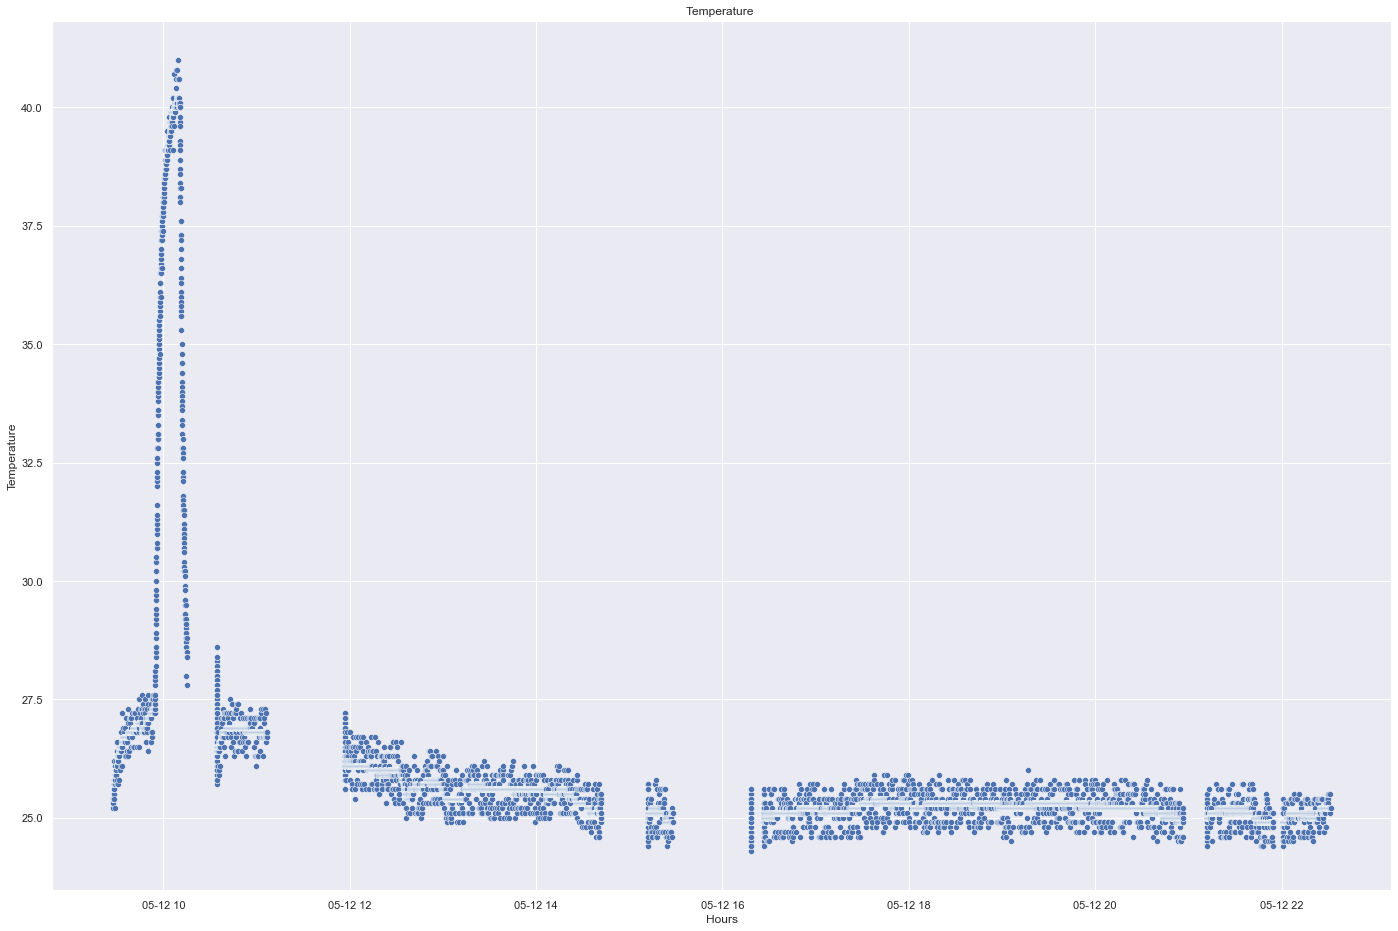

In [29]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(rc = {'figure.figsize':(24,16)})

df_all = df

df = df.loc['2022-05-12':]

plot_0 = sns.scatterplot(data=df, x = df.index, y = 'Temperature')

plt.title('Temperature ')
plt.xlabel('Hours')
plt.show()


<AxesSubplot:xlabel='hours'>

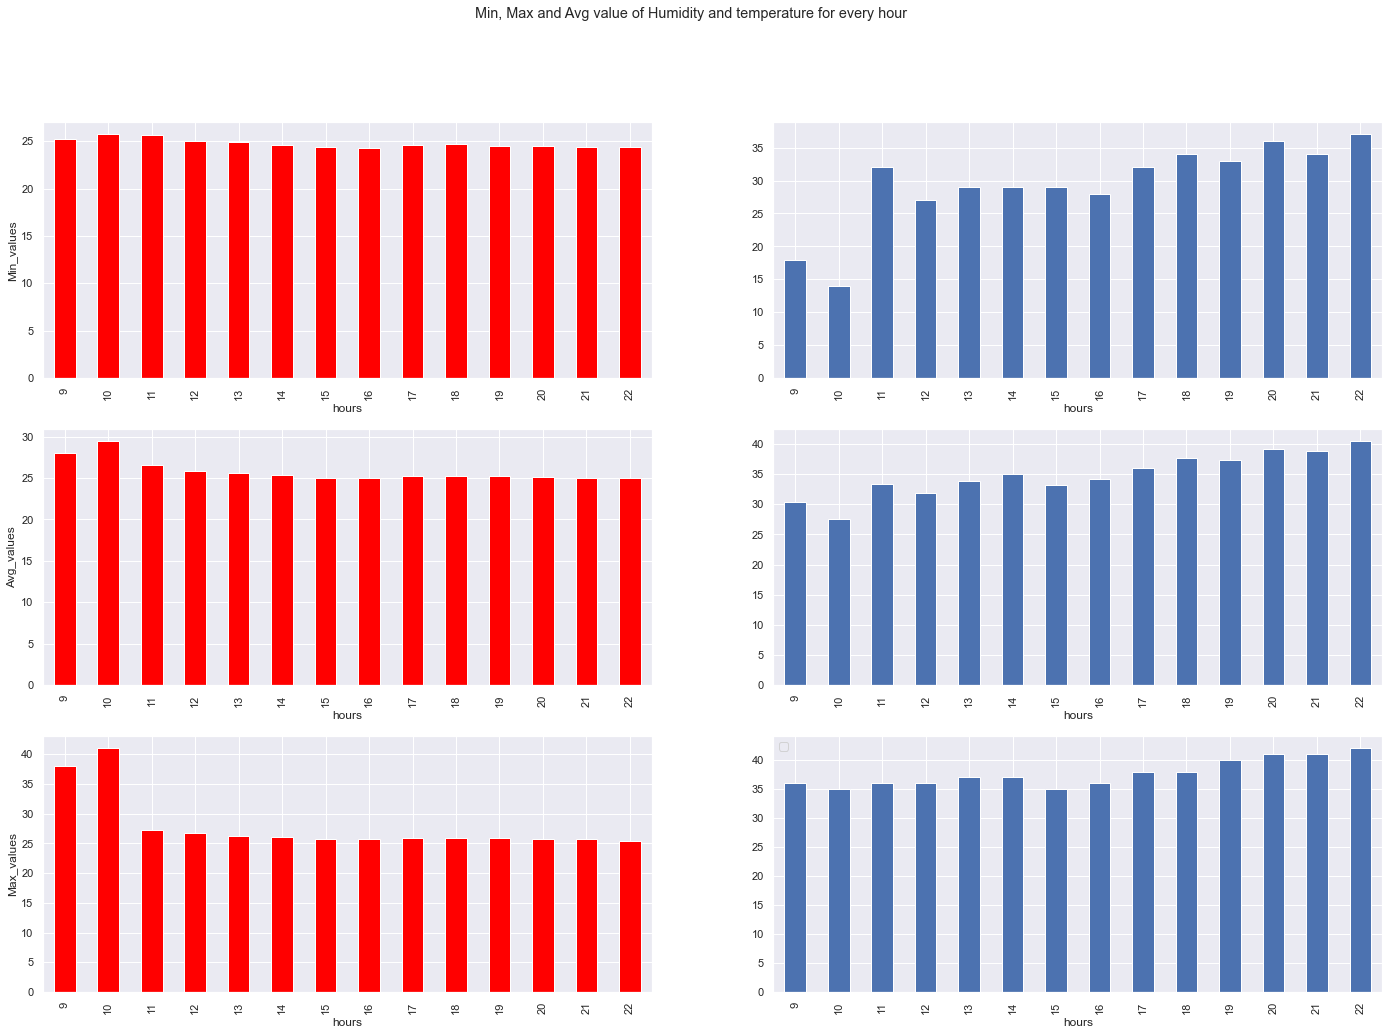

In [32]:

temp_min = df['Temperature'].groupby(df.index.hour).min()
hum_min = df['Humidity'].groupby(df.index.hour).min()
temp_max = df['Temperature'].groupby(df.index.hour).max()
hum_max = df['Humidity'].groupby(df.index.hour).max()
temp_avg = df['Temperature'].groupby(df.index.hour).mean()
hum_avg = df['Humidity'].groupby(df.index.hour).mean()

fig, axes = plt.subplots(3,2)

plt.suptitle("Min, Max and Avg value of Humidity and temperature for every hour")
plt.legend(df[['Temperature', 'Humidity']])

temp_min.plot(ax = axes[0, 0], kind = 'bar',  xlabel = 'hours', ylabel = 'Min_values', color = "red")
temp_avg.plot(ax = axes[1, 0], kind = 'bar',  xlabel = 'hours', ylabel = 'Avg_values', color = "red")
temp_max.plot(ax = axes[2, 0], kind = 'bar',  xlabel = 'hours', ylabel = 'Max_values', color = "red")
hum_min.plot(ax = axes[0, 1], kind = 'bar', xlabel = 'hours')
hum_avg.plot(ax = axes[1, 1], kind = 'bar', xlabel = 'hours')
hum_max.plot(ax = axes[2, 1], kind = 'bar',  xlabel = 'hours')


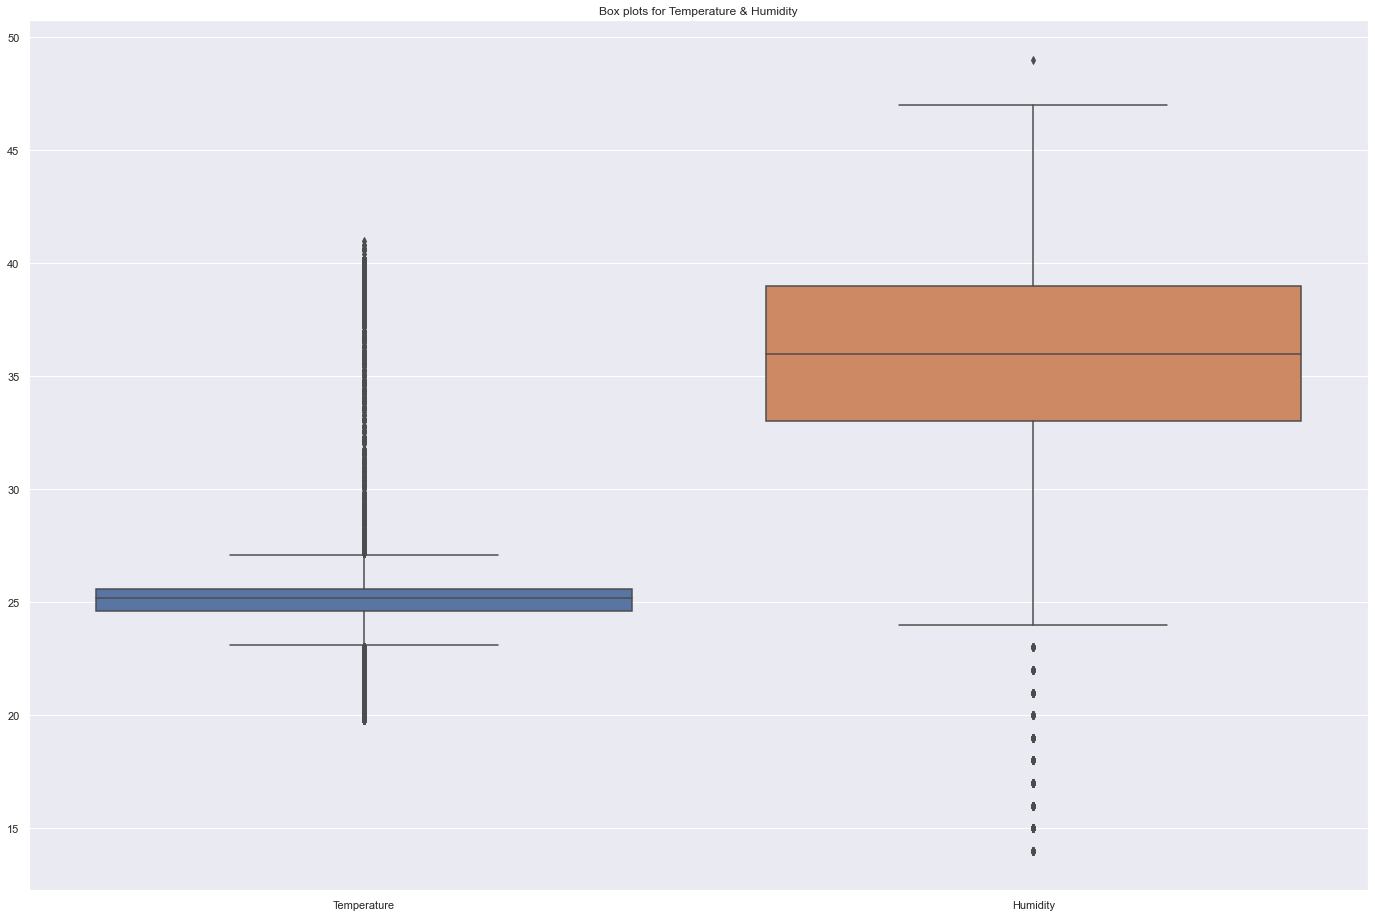

In [44]:
sns.boxplot(data = df[['Temperature', 'Humidity']])

plt.title('Box plots for Temperature & Humidity')
plt.show()


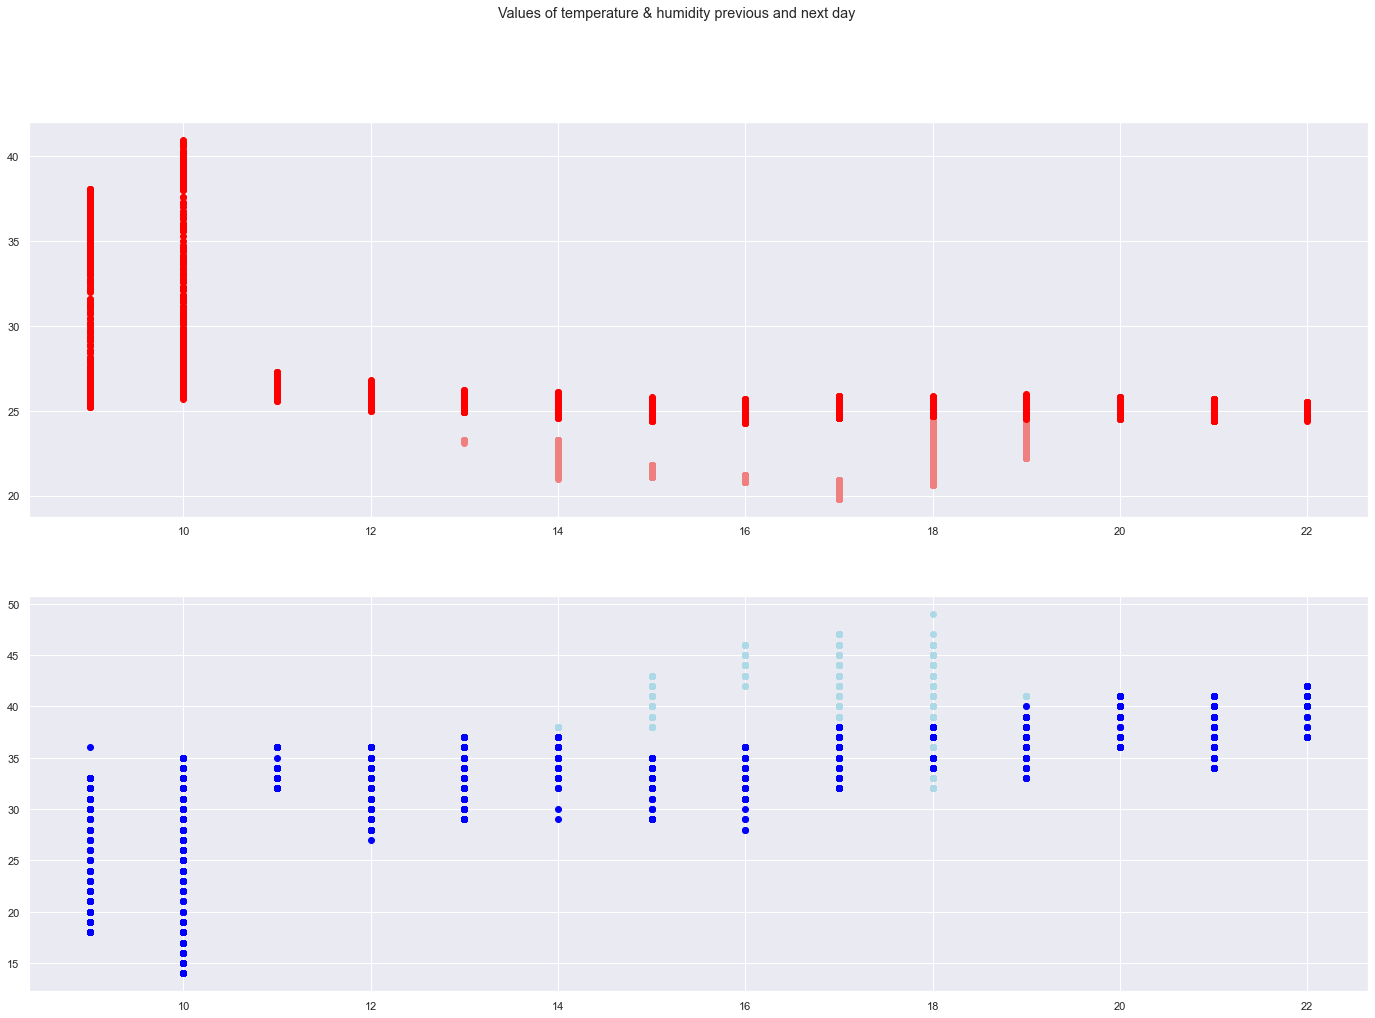

In [34]:

df_prev_day = df_all[['Temperature', 'Humidity']].loc[:'2022-04-15']

df_next_day = df[['Temperature', 'Humidity']]

fig, axes = plt.subplots(2)


axes[0].scatter(df_prev_day.index.hour, df_prev_day['Temperature'], c = 'lightcoral')
axes[0].scatter(df_next_day.index.hour, df_next_day['Temperature'],  c = 'red')
axes[1].scatter(df_prev_day.index.hour, df_prev_day['Humidity'], c = 'lightblue')
axes[1].scatter(df_next_day.index.hour, df_next_day['Humidity'], c = 'blue')

fig.suptitle('Values of temperature & humidity previous and next day')

plt.show()

In [35]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df_all.index), y=list(df_all['Temperature'])))

# Set title
fig.update_layout(
    title_text="Values of Temperature at different times"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1h",
                     step="hour",
                     stepmode="backward"),
                dict(count=1,
                     label="1d",
                     step="day",
                     stepmode="backward"),
                dict(count=7,
                     label="1w",
                     step="day",
                     stepmode="backward"),
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()